In [1]:
pip install tensorflow==1.15

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# function to read the wine dataset
def read_dataset():

    df = pd.read_csv("wine.csv")
    print(len(df.columns))
    print(df.head())
    X = df.drop(["Wine"], axis=1).values
    y = df["Wine"].values
    Y = one_hot_encode(y)

    return (X, Y, y)

<IPython.core.display.Javascript object>

In [4]:
# standardize the features of the dataset
def feature_normalize(features):
    mu = np.mean(features, axis=0)
    sigma = np.std(features, axis=0)
    normalize_features = (features - mu) / sigma
    return normalize_features

<IPython.core.display.Javascript object>

In [5]:
# appending the bias
def append_bias_reshape(features):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    features = np.reshape(
        np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1]
    )
    return features

<IPython.core.display.Javascript object>

In [6]:
# define the one hot encode function
def one_hot_encode(labels):
    labels = labels.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown="ignore")
    enc.fit(labels)
    result = enc.transform(labels).toarray()
    return result

<IPython.core.display.Javascript object>

In [7]:
# plot the graph for the data
def plot_points(features, labels):

    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(features[normal, 0], features[normal, 1], "bx")
    plt.plot(features[outliers, 0], features[outliers, 1], "ro")
    plt.xlabel("Features")
    plt.ylabel("Wine Class")
    plt.show()

<IPython.core.display.Javascript object>

14
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


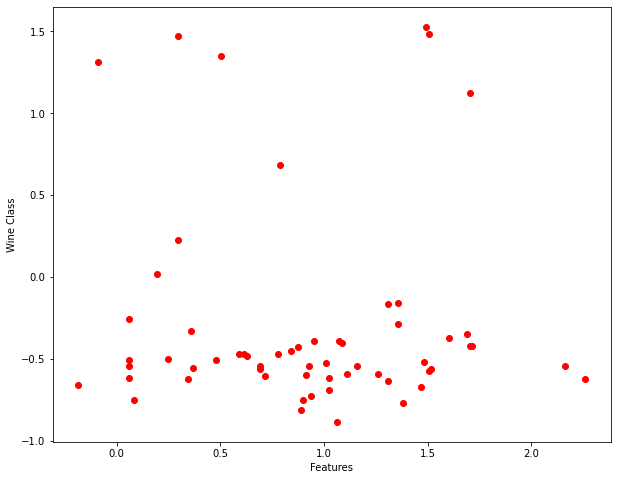

<IPython.core.display.Javascript object>

In [8]:
# read the data
X, Y, y = read_dataset()  # X - Features , Y - Labels
normalized_X = feature_normalize(X)
plot_points(normalized_X, y)
# print(X)

In [9]:
# Transform the data in training and testing
# X, Y = shuffle(normalized_featues, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(
    normalized_X, Y, test_size=0.20, random_state=42
)

<IPython.core.display.Javascript object>

In [10]:
# print the shape of the train and test data values
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(142, 13)
(142, 3)
(36, 13)
(36, 3)


<IPython.core.display.Javascript object>

In [11]:
# define and initialize the variables to work with the tensors
learning_rate = 0.1
training_epochs = 100

cost_history = np.empty(shape=[1], dtype=float)

n_dim = X.shape[1]
print(n_dim)
n_class = 3

x = tf.placeholder(tf.float32, [None, n_dim])
print(x)
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

13
Tensor("Placeholder:0", shape=(?, 13), dtype=float32)


<IPython.core.display.Javascript object>

In [12]:
# initialize all variables.
init = tf.global_variables_initializer()

# define the cost function
y_ = tf.placeholder(tf.float32, [None, n_class])
y = tf.nn.softmax(tf.matmul(x, W) + b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)), reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

<IPython.core.display.Javascript object>

In [13]:
# initialize the session
sess = tf.Session()
sess.run(init)
mse_history = []

<IPython.core.display.Javascript object>

In [14]:
# calculate the cost for each epoch
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    # print(x)
    # print(y_)
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    pred_y = sess.run(y, feed_dict={x: test_x})
    print("epoch : ", epoch, " - ", "cost: ", cost)

    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))

epoch :  0  -  cost:  0.9301301
epoch :  1  -  cost:  0.8029725
epoch :  2  -  cost:  0.7062242
epoch :  3  -  cost:  0.63127375
epoch :  4  -  cost:  0.5719493
epoch :  5  -  cost:  0.52398974
epoch :  6  -  cost:  0.48446542
epoch :  7  -  cost:  0.45133823
epoch :  8  -  cost:  0.4231632
epoch :  9  -  cost:  0.39889452
epoch :  10  -  cost:  0.37775928
epoch :  11  -  cost:  0.35917553
epoch :  12  -  cost:  0.34269705
epoch :  13  -  cost:  0.32797635
epoch :  14  -  cost:  0.31473854
epoch :  15  -  cost:  0.30276388
epoch :  16  -  cost:  0.2918741
epoch :  17  -  cost:  0.28192344
epoch :  18  -  cost:  0.27279115
epoch :  19  -  cost:  0.26437664
epoch :  20  -  cost:  0.25659546
epoch :  21  -  cost:  0.24937579
epoch :  22  -  cost:  0.24265663
epoch :  23  -  cost:  0.23638545
epoch :  24  -  cost:  0.23051707
epoch :  25  -  cost:  0.22501214
epoch :  26  -  cost:  0.21983643
epoch :  27  -  cost:  0.21495983
epoch :  28  -  cost:  0.21035597
epoch :  29  -  cost:  0.20600

<IPython.core.display.Javascript object>

MSE: [0.1827408914158887, 0.15125514138251117, 0.12689868356261755, 0.10815862170080594, 0.09361911862033025, 0.08218013685402532, 0.07304171564499566, 0.06563219030717647, 0.05954154443351154, 0.05447215140866243, 0.050204708935140945, 0.04657517120657465, 0.04345904391925875, 0.04076058044921881, 0.03840524258586758, 0.03633434865402457, 0.03450123596444817, 0.03286843703355682, 0.03140562001299502, 0.03008800743783399, 0.028895236205248438, 0.027810428171777087, 0.026819514925790718, 0.0259106873752037, 0.025073983470020628, 0.02430094607394454, 0.023584363932343193, 0.022918049503169332, 0.02229667425602216, 0.02171562365020924, 0.021170892418361766, 0.020658983352373997, 0.02017682893103068, 0.019721736514767562, 0.01929132559318229, 0.01888349087868196, 0.018496362355576612, 0.018128272024659695, 0.01777772615462847, 0.01744339114857901, 0.017124064171996207, 0.016818661996807035, 0.016526206820873843, 0.016245811825572158, 0.015976671600256485, 0.01571805498697653, 0.01546929092

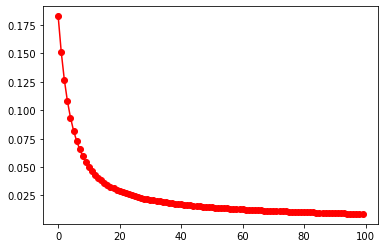

<IPython.core.display.Javascript object>

In [15]:
# print the final mean square error
print("MSE:", mse_history)
plt.plot(mse_history, "ro-")
plt.show()

In [16]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Accuracy:  1.0


<IPython.core.display.Javascript object>

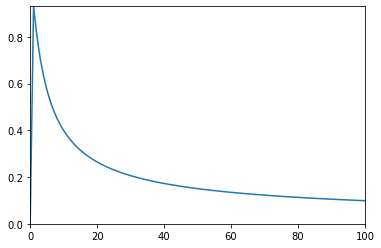

<IPython.core.display.Javascript object>

In [17]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()